# Práctica Machine Learning

Esta práctica consiste en entrenar una IA para que identifique diferentes tipos de entradas de datos, y pueda tomar una decisión concluyente; solo tendra tres opciones: Permitir acceso, bloquear acceso o ignorar acceso de estrada a la red. 

Por lo tanto, dependiendo del tipo de conexionarme que se nos intente realizar, la IA tomará una de esas 3 decisiones.

Vamos a proceder a entrenarla con el método de clasificación, pero antes debemos saber con que tivo de datos nos encontramos.

### Diccionario de datos

Las variables presentes en este dataset son:

* __Timestamp__.                  (object) Fecha y hora, por ejemplo: “2022-03-17 12:32:16”)
* __Source IP Address__.          (object) Dirección IP de origen, por ejemplo: “149.46.211.219”
* __Destination IP Address__.     (object) Dirección IP de destino, por ejemplo: “62.75.28.249”
* __Source Port__.                 (int64) Número de puerto de origen, por ejemplo: “58709”
* __Destination Port__.             (int64) Dirección IP de destino, por ejemplo: “62.75.28.249”
* __Protoco__.                  (object) Protocolo de comunicación, por ejemplo: “TCP”
* __Packet Length__.                (int64) Longitud del paquete, por ejemplo: “227”
* __Packet Type__.               (object) Tipo de paquete, por ejemplo: “Data”
* __Traffic Type__.                (object) Tipo de tráfico, por ejemplo: “DNS”
* __Payload Data__.              (object) Datos del payload, puede ser texto o datos binarios, por ejemplo: “Accusantium repellat esse vitae quaerat tenetu…”
* __Malware Indicators__.          (object) Indicadores de malware, en caso de existir
* __Anomaly Scores__.            (float64) Puntuación de anomalía, por ejemplo: un valor numérico que indica el nivel de anomalía
* __Alerts/Warnings__.             (object) Alertas o advertencias del sistema, por ejemplo: “Alert Data”
* __Attack Type__.                (object) Tipo de ataque, por ejemplo: “DDoS”, “Phishing”, etc.
* __Attack Signature__.            (object) Firma del ataque, por ejemplo: “XYZ attack signature”
* __Action Taken__.                (object) Acción tomada por el sistema, por ejemplo: “Ignored”
* __Severity Level__.              (object) Nivel de severidad del evento, por ejemplo: “Medium”
* __User Information__.            (object) Información del usuario, por ejemplo: “Yakshit Wadhwa”
* __Device Information__.          (object) Información sobre el dispositivo, por ejemplo: “Mozilla/5.0 (compatible; MSIE 6.0; Windows NT …)”
* __Network Segment__.             (object) Segmento de la red, por ejemplo: “Segment C”
* __Geo-location Data__.           (object) Ubicación geográfica, por ejemplo: “Bhiwandi, Maharashtra”
* __Proxy Information__.           (object) Información sobre el proxy, por ejemplo: “55.149.98.92”
* __Firewall Logs__.               (object) Logs del firewall, puede ser texto o vacío
* __IDS/IPS Alerts__.              (object) Alertas del sistema de detección o prevención de intrusos, por ejemplo: “Alert Data”
* __Log Source__.                  (object) Fuente del log, por ejemplo: “Firewall”

> Ahora vamos a seguir unas pautas paso a paso hasta entrenar el modelo; desde el análisis de la base de datos hasta haber logrado un modelo funcional y poder realizar una conclusión robusta.

Lo que realiza esta celda es importar la función **plot_confusion_matrix**, **poly_linear_regression** y **CM_BRIGHT** desde el módulo llamado **utils** que se encuentra en nuestro directorio inicial. 

Además se importa las bibiotecas de **numpy** (es un módulo para la realizacion de operaciones algebraicas con matrices y vectores) y **pandas** (es un módulo para la construcción y manipulacion de DataFrames) asignandoles a su vez un acrónimo.

Ahora importamos Scikit-Learn (**sklearn**), que es una biblioteca para aprendizaje automático que incluye algoritmos de clasificación, regresión y clustering. También proporciona herramientas para preprocesamiento de datos, reducción de dimensionalidad y evaluación de modelos.

A continiación, se importa **matplotlib.pyplot** para generar gráficos, y se activa **%matplotlib inline** para que permita visualizar los mismos gráficos directamente desde el propio **notebook de jupyter**.

Por último, el código importa el módulo warnings y luego desactiva todas las advertencias en Python. Esto evita que se muestren mensajes de advertencia en la consola, lo cual puede ser útil para limpiar la salida, pero también puede ocultar problemas que podrían afectar el código en el futuro.

In [1]:
from utils import plot_confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Ahora vamos a traer la base de datos y los vamos a guardar en cb.
df = pd.read_csv('./practica_final/cybersecurity_attacks.csv')

In [3]:
# 2. Ahora vamos a visualizar la base de datos entera.
pd.options.display.max_columns = None

In [4]:
# 3. Ahora veremos de cuantas filas y columnas esta compuesto nuestro DataFrame.
df.shape

(40000, 25)

In [5]:
# 3.1 Visualizár las 10 primeras filas.
df.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,NaN,5.76,NaN,Malware,Known Pattern A,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,NaN,31.55,NaN,DDoS,Known Pattern B,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,NaN,16.51,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


In [6]:
# 3.2 Visualizar las 10 últimas filas.
df.tail(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
39990,2022-03-17 12:32:16,149.46.211.219,62.75.28.249,58709,2951,TCP,227,Data,DNS,Accusantium repellat esse vitae quaerat tenetu...,NaN,96.07,NaN,DDoS,Known Pattern A,Ignored,Medium,Yakshit Wadhwa,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Bhiwandi, Maharashtra",55.149.98.92,NaN,Alert Data,Firewall
39991,2020-11-14 05:41:54,66.200.132.243,88.211.51.78,8125,25130,ICMP,81,Control,DNS,Qui dicta occaecati tenetur recusandae. Eos re...,IoC Detected,34.13,Alert Triggered,Intrusion,Known Pattern A,Ignored,Low,Badal Dhawan,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment A,"Sambhal, Assam",NaN,Log Data,Alert Data,Firewall
39992,2021-08-13 18:57:13,163.227.253.64,98.219.251.81,4492,20181,TCP,1010,Control,FTP,Modi nesciunt laudantium. Doloremque assumenda...,IoC Detected,11.28,NaN,Malware,Known Pattern B,Ignored,Low,Miraan Guha,Mozilla/5.0 (X11; Linux i686) AppleWebKit/531....,Segment B,"Faridabad, Haryana",NaN,NaN,NaN,Server
39993,2022-09-07 00:49:00,214.124.216.123,182.116.16.113,56538,63148,ICMP,1478,Data,FTP,Voluptatem eius excepturi reiciendis. Repudian...,IoC Detected,87.59,Alert Triggered,Intrusion,Known Pattern A,Ignored,High,Jayan Baral,Opera/9.60.(Windows NT 4.0; is-IS) Presto/2.9....,Segment C,"Solapur, Chhattisgarh",NaN,Log Data,Alert Data,Server
39994,2023-06-06 10:49:11,148.186.164.130,191.150.79.23,36782,9565,UDP,156,Data,FTP,Cum officia nostrum odit esse.\nIllum aliquid ...,NaN,60.48,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Badal Batra,Mozilla/5.0 (compatible; MSIE 5.0; Windows 98;...,Segment B,"Malda, West Bengal",24.161.236.19,Log Data,NaN,Firewall
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server
39999,2023-10-10 11:59:52,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,Eligendi omnis voluptate nihil voluptatibus do...,NaN,34.63,Alert Triggered,Intrusion,Known Pattern B,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,"Pudukkottai, West Bengal",112.169.115.139,Log Data,Alert Data,Firewall


In [7]:
# 4. Nos mostrara la base de datos incluyendo todas las columnas, además nos sustituira los valores nulos por "-".
df.describe(include='all').fillna('-')

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,20000,40000.0,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,1,-,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,-,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,20000,-,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-,-,-,-


> A simple vista nos vamos a deshacer de todas las columnas que contengas valores únicos, como es el caso de Source IP Address, Destination IP Address y Payload Data, ya que no aportarían ningún tipo de valor en el entrenamiento porque hay el mismo número de valores únicos como de filas.
> También nos vamos a deshacer de la columnas que creemos que no nos van a servir, como Timestamp, User Information, Device Information (esta columna la eliminamos porque es demasiado compleja para nosotros) y Proxy Information.

In [8]:
# 5. Vamos a eliminar las columnas que creemos innecesarias.
df = df.drop(columns=['Source IP Address', 'Destination IP Address', 'Payload Data', 'Timestamp', 'User Information', 'Device Information', 'Proxy Information'])

In [9]:
# 6. Volvemos a visualizar nuestro DataFriem.
df.describe(include='all').fillna('-')

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000.0,40000.0,40000,40000.0,40000,40000,20000,40000.0,19933,40000,40000,40000,40000,40000,40000,20039,19950,40000
unique,-,-,3,-,2,3,1,-,1,3,2,3,3,3,8723,1,1,2
top,-,-,ICMP,-,Control,DNS,IoC Detected,-,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Segment C,"Ghaziabad, Meghalaya",Log Data,Alert Data,Firewall
freq,-,-,13429,-,20237,13376,20000,-,19933,13428,20076,13529,13435,13408,16,20039,19950,20116
mean,32970.35645,33150.86865,-,781.452725,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-
std,18560.425604,18574.668842,-,416.044192,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-
min,1027.0,1024.0,-,64.0,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-
25%,16850.75,17094.75,-,420.0,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-
50%,32856.0,33004.5,-,782.0,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-
75%,48928.25,49287.0,-,1143.0,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-


In [10]:
# 7. Ahora vamos a desacernos de las columnas que creamos que nos pueden dar varios problemas por su falta de datos.
df = df.drop(columns=['Alerts/Warnings', 'Firewall Logs'])

In [11]:
# 8. Volvemos a visualizar nuestro DataFriem.
df.describe(include='all').fillna('-')

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,IDS/IPS Alerts,Log Source
count,40000.0,40000.0,40000,40000.0,40000,40000,20000,40000.0,40000,40000,40000,40000,40000,40000,19950,40000
unique,-,-,3,-,2,3,1,-,3,2,3,3,3,8723,1,2
top,-,-,ICMP,-,Control,DNS,IoC Detected,-,DDoS,Known Pattern A,Blocked,Medium,Segment C,"Ghaziabad, Meghalaya",Alert Data,Firewall
freq,-,-,13429,-,20237,13376,20000,-,13428,20076,13529,13435,13408,16,19950,20116
mean,32970.35645,33150.86865,-,781.452725,-,-,-,50.113473,-,-,-,-,-,-,-,-
std,18560.425604,18574.668842,-,416.044192,-,-,-,28.853598,-,-,-,-,-,-,-,-
min,1027.0,1024.0,-,64.0,-,-,-,0.0,-,-,-,-,-,-,-,-
25%,16850.75,17094.75,-,420.0,-,-,-,25.15,-,-,-,-,-,-,-,-
50%,32856.0,33004.5,-,782.0,-,-,-,50.345,-,-,-,-,-,-,-,-
75%,48928.25,49287.0,-,1143.0,-,-,-,75.03,-,-,-,-,-,-,-,-


In [12]:
# 9. Solamente hay un tipo de valor, por lo cual habra que añadirle el contrario.
df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [13]:
# 10. Solamente hay un tipo de valor, por lo cual habra que añadirle el contrario.
df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [14]:
# 11. Ahora debemos de rellenar las columnas que tienen datos nulos con sus contrarios.
df['Malware Indicators'] = df['Malware Indicators'].fillna('Ioc No Detected')
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna('No Alert Data')

In [15]:
# 12. Con este DataFrame vamos a trabajar.
df.describe(include='all').fillna('-')

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,IDS/IPS Alerts,Log Source
count,40000.0,40000.0,40000,40000.0,40000,40000,40000,40000.0,40000,40000,40000,40000,40000,40000,40000,40000
unique,-,-,3,-,2,3,2,-,3,2,3,3,3,8723,2,2
top,-,-,ICMP,-,Control,DNS,IoC Detected,-,DDoS,Known Pattern A,Blocked,Medium,Segment C,"Ghaziabad, Meghalaya",No Alert Data,Firewall
freq,-,-,13429,-,20237,13376,20000,-,13428,20076,13529,13435,13408,16,20050,20116
mean,32970.35645,33150.86865,-,781.452725,-,-,-,50.113473,-,-,-,-,-,-,-,-
std,18560.425604,18574.668842,-,416.044192,-,-,-,28.853598,-,-,-,-,-,-,-,-
min,1027.0,1024.0,-,64.0,-,-,-,0.0,-,-,-,-,-,-,-,-
25%,16850.75,17094.75,-,420.0,-,-,-,25.15,-,-,-,-,-,-,-,-
50%,32856.0,33004.5,-,782.0,-,-,-,50.345,-,-,-,-,-,-,-,-
75%,48928.25,49287.0,-,1143.0,-,-,-,75.03,-,-,-,-,-,-,-,-


In [16]:
# 13. Podemos observar que todas las columnas estan con un valor asignado, además podemos saber con cuantas columnas y filas valos a trabajar.
df.shape

(40000, 16)

In [17]:
# 14. Para saber si los datos estan equilibrados.
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [18]:
# 14.1 Para saber si los datos estan equilibrados.
df['Packet Type'].value_counts()

Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

In [19]:
# 14.2 Para saber si los datos estan equilibrados.
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

In [20]:
# 14.3 Para saber si los datos estan equilibrados.
df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected       20000
Ioc No Detected    20000
Name: count, dtype: int64

In [21]:
# 14.4 Para saber si los datos estan equilibrados.
df['Attack Type'].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [22]:
# 14.5 Para saber si los datos estan equilibrados.
df['Attack Signature'].value_counts()

Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64

In [23]:
# 14.6 Para saber si los datos estan equilibrados.
df['Severity Level'].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

In [24]:
# 14.7 Para saber si los datos estan equilibrados.
df['Network Segment'].value_counts()

Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

In [25]:
# 14.8 Para saber si los datos estan equilibrados.
df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
No Alert Data    20050
Alert Data       19950
Name: count, dtype: int64

In [26]:
# 14.9 Para saber si los datos estan equilibrados.
df['Log Source'].value_counts()

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

> A hojo podemos observar que no habra mucho sesgo en el entdrenamiento, ya que los datos estan bastante equilibrados.

In [27]:
# 15. Para saber si nos vamos a encontrar ante un problema de balanceo.
df['Action Taken'].value_counts()

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

<Axes: xlabel='Action Taken'>

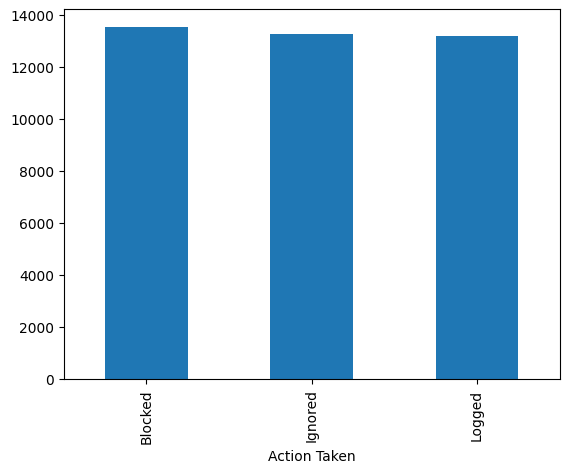

In [28]:
# 15.1 Representación gráfica.
df['Action Taken'].value_counts().plot.bar()

> Podemos observar que los datos estan equilibrados, y por lo tanto nos encontramos ante un **problema balanceado**.

In [29]:
# 16. Vamos a observar la correlacion solo en variables numericas. Para saber las columnas numéricas:
df.select_dtypes(include=['number'])

# Vamos a encontrar 4 columnas.

,Source Port,Destination Port,Packet Length,Anomaly Scores
0,31225,17616,503,28.67
1,17245,48166,1174,51.50
2,16811,53600,306,87.42
3,20018,32534,385,15.79
4,6131,26646,1462,0.52
...,...,...,...,...
39995,31005,6764,1428,39.28
39996,2553,28091,1184,27.25
39997,22505,25152,1043,31.01
39998,20013,2703,483,97.85


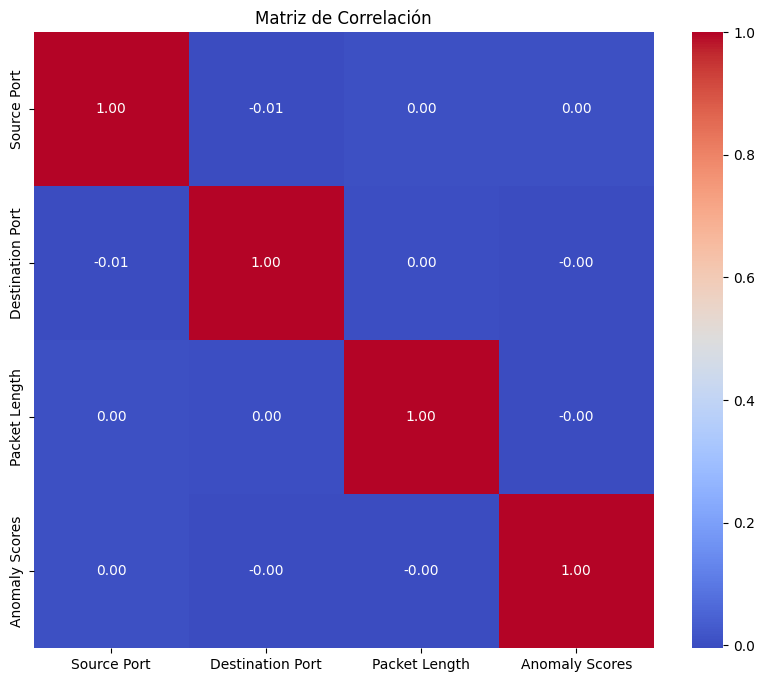

In [30]:
# 16.1. Vamos a observar la correlacion solo en variables numericas. 
import seaborn as sns
import matplotlib.pyplot as plt

# Solamente elejimos las columnas con valores cuantitativos.
df_corr = df[['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']]

# Ajustar el tamaño de la figura del gráfico (10x8 pulgadas)
plt.figure(figsize=(10, 8))

# Crear un heatmap (mapa de calor) con la matriz de correlación del DataFrame.
sns.heatmap(df_corr.corr(),  # Calcula la matriz de correlación de df_corr (Columnas con valores cuantitativos).
            annot=True,      # Muestra los valores numéricos dentro de cada celda.
            cmap='coolwarm', # Usa la paleta de colores "coolwarm" para representar las correlaciones; de esta manera es más visual.
            fmt='.2f')       # Formato de los valores numéricos con 2 decimales.

# Agregar un título al gráfico.
plt.title("Matriz de Correlación")

# Mostrar el gráfico.
plt.show()

> Nos damos cuenta que entre estas 4 columnas la matrix de correlacion en diagonal de color rojo es perfecta, ya que la correlacion de un valor consigo mismo siempre es perfecto. Luego podemos obsevar que Source Port y Destination Port tienen una correlación de -0.01, lo que significa que no hay casi ninguna relación entre estas dos columnas. Y por último, las demas columnas tienen una correlación de 0,00, lo que significa que no hay ninguna tipo de correlación entre ellas y por tanto cada variable es única y contribuye de una manera independiente en el entrenamiento y el test. (También hay bariables -0,00, pero como 0 = -0 imagino que no tendra ningún significado especial).

In [31]:
# 17. Ahora vamos a separar las variables de la columana Geo-location Data para poder darles utilidad a los datos, ya que los datos estan seccionados en ciudad/estado pero no tienen correlación ninguna.
df[['Ciudad', 'Estado']] = df['Geo-location Data'].str.split(',', expand=True)

In [32]:
df.describe(include='all').fillna('-')
# Podemos observar que tenemos 316 Ciudades diferentes y 28 Estados.

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,IDS/IPS Alerts,Log Source,Ciudad,Estado
count,40000.0,40000.0,40000,40000.0,40000,40000,40000,40000.0,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,-,-,3,-,2,3,2,-,3,2,3,3,3,8723,2,2,316,28
top,-,-,ICMP,-,Control,DNS,IoC Detected,-,DDoS,Known Pattern A,Blocked,Medium,Segment C,"Ghaziabad, Meghalaya",No Alert Data,Firewall,Ghaziabad,Manipur
freq,-,-,13429,-,20237,13376,20000,-,13428,20076,13529,13435,13408,16,20050,20116,241,1498
mean,32970.35645,33150.86865,-,781.452725,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-
std,18560.425604,18574.668842,-,416.044192,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-
min,1027.0,1024.0,-,64.0,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-
25%,16850.75,17094.75,-,420.0,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-
50%,32856.0,33004.5,-,782.0,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-
75%,48928.25,49287.0,-,1143.0,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-


In [33]:
# Y ahora podemos eliminar la columna Geo-location Data.
df = df.drop(columns=['Geo-location Data'])

<Axes: xlabel='Ciudad'>

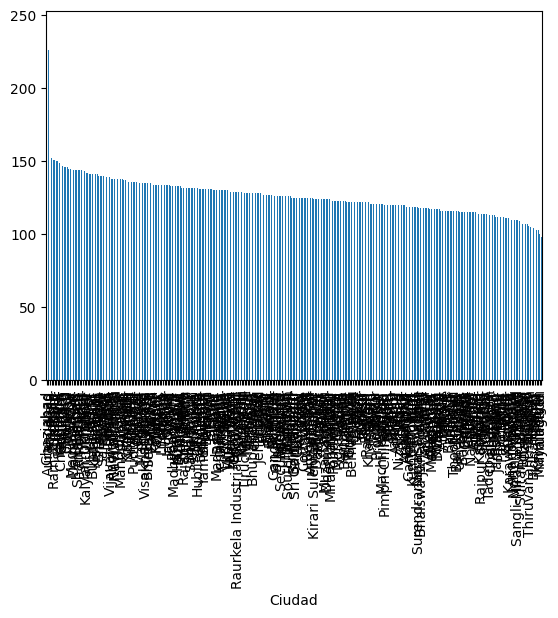

In [34]:
# 17.2 Ahora vamos a analizar las dos columnas de ciudades y estados de la India.
df['Ciudad'].value_counts().plot.bar()

# Observamos que hay dos Ciudades que sobre salen, pero los demás datos tambien tienen una diferencia significativa entre ellos. Por lo tanto en el entrenamiento habra un pequeño sesgo.

In [35]:
# Los datos estan muy desiguales.
df['Ciudad'].value_counts()

Ciudad
Ghaziabad      241
Aurangabad     226
Rourkela       154
Rohtak         152
Ramagundam     151
              ... 
Bhind          104
Morbi          103
Karimnagar     103
Miryalaguda    100
Tirunelveli     98
Name: count, Length: 316, dtype: int64

<Axes: xlabel='Estado'>

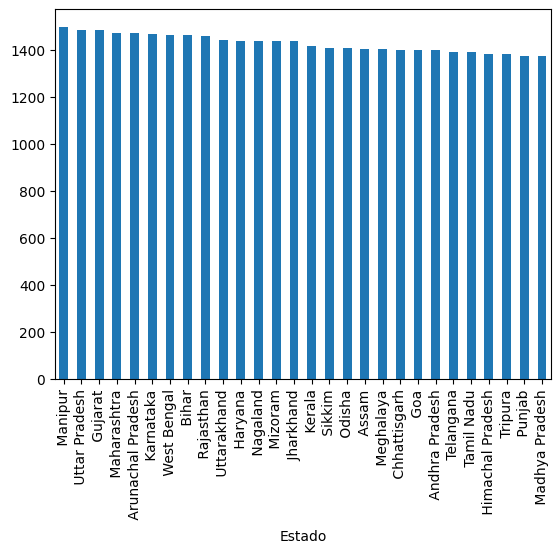

In [36]:
# 17.3 Ahora vamso a analizar las dos columnas de ciudades y estados de la India.
df['Estado'].value_counts().plot.bar()

# En la columna de Estado también habrá un pequeño sesgo.

In [37]:
# Los datos estan muy desiguales.
df['Estado'].value_counts()

Estado
 Manipur              1498
 Uttar Pradesh        1485
 Gujarat              1483
 Maharashtra          1474
 Arunachal Pradesh    1472
 Karnataka            1467
 West Bengal          1465
 Bihar                1462
 Rajasthan            1460
 Uttarakhand          1441
 Haryana              1440
 Nagaland             1439
 Mizoram              1438
 Jharkhand            1437
 Kerala               1416
 Sikkim               1410
 Odisha               1410
 Assam                1404
 Meghalaya            1403
 Chhattisgarh         1400
 Goa                  1399
 Andhra Pradesh       1399
 Telangana            1393
 Tamil Nadu           1393
 Himachal Pradesh     1384
 Tripura              1381
 Punjab               1374
 Madhya Pradesh       1373
Name: count, dtype: int64

In [38]:
# 18. Primero vamos a asignar la variable "x" con todas las columnas menos nuestra "y".
x = df.drop(columns=['Action Taken'])
x

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Severity Level,Network Segment,IDS/IPS Alerts,Log Source,Ciudad,Estado
0,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Malware,Known Pattern B,Low,Segment A,No Alert Data,Server,Jamshedpur,Sikkim
1,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Malware,Known Pattern A,Low,Segment B,No Alert Data,Firewall,Bilaspur,Nagaland
2,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,DDoS,Known Pattern B,Low,Segment C,Alert Data,Firewall,Bokaro,Rajasthan
3,20018,32534,UDP,385,Data,HTTP,Ioc No Detected,15.79,Malware,Known Pattern B,Medium,Segment B,Alert Data,Firewall,Jaunpur,Rajasthan
4,6131,26646,TCP,1462,Data,DNS,Ioc No Detected,0.52,DDoS,Known Pattern B,Low,Segment C,Alert Data,Firewall,Anantapur,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,UDP,1428,Control,HTTP,IoC Detected,39.28,DDoS,Known Pattern A,Medium,Segment A,Alert Data,Firewall,Nashik,Manipur
39996,2553,28091,UDP,1184,Control,HTTP,IoC Detected,27.25,DDoS,Known Pattern A,High,Segment C,No Alert Data,Firewall,Vadodara,Mizoram
39997,22505,25152,UDP,1043,Data,DNS,IoC Detected,31.01,DDoS,Known Pattern B,Low,Segment C,Alert Data,Server,Mahbubnagar,Himachal Pradesh
39998,20013,2703,UDP,483,Data,FTP,IoC Detected,97.85,Malware,Known Pattern B,Low,Segment B,No Alert Data,Server,Rourkela,Arunachal Pradesh


In [39]:
# 19. Ahora vamos a sonsacar de la vase de datos nuestra target (columna de predecir).
y = df['Action Taken']
y

0         Logged
1        Blocked
2        Ignored
3        Blocked
4        Blocked
          ...   
39995     Logged
39996     Logged
39997    Blocked
39998    Ignored
39999     Logged
Name: Action Taken, Length: 40000, dtype: object

> Hemos designado en la variable "y" el target a predecir. Esta columna "Action Taken" también contiene 40.000 filas.
>
> * __Action Taken__.                (object) Acción tomada por el sistema, por ejemplo: “Ignored” 

In [40]:
# 20. Ahora vamos a comprobar el tipo de dato almacenado en cada columna.
x.dtypes

Source Port             int64
Destination Port        int64
Protocol               object
Packet Length           int64
Packet Type            object
Traffic Type           object
Malware Indicators     object
Anomaly Scores        float64
Attack Type            object
Attack Signature       object
Severity Level         object
Network Segment        object
IDS/IPS Alerts         object
Log Source             object
Ciudad                 object
Estado                 object
dtype: object

> Como nos encontramos tanto con texto como con números vamos a realizar el modelo utilizando Random Forest.

In [41]:
# 21. Para saber que tipo de variables contiene la columna "Action Taken".
y.unique()

array(['Logged', 'Blocked', 'Ignored'], dtype=object)

> Ahora sabemos que tipo de dtype es y que solo contiene tres tipos de variables.

In [42]:
# Para saber cuantas veces se repite cada variable.
df['Action Taken'].value_counts()

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

In [43]:
# 22. Ahora procederemos a realizar el entrenamiento. 
#Primero realizamos un Árbol de decisión individual.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = x

# Identificar columnas categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns  

# Aplicar Label Encoding a las columnas categóricas, para convertirlas en cuantitativas.
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

# Ahora podemos dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Hemos convertido todos los datos cualitativos en cuantitativos, ya que el árbol de decisiones solo trabaja con datos cuantitativos. Y, por último, hemos dividido los datos en test y  train.

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best mean cross-validation score: 0.340
best parameters: {'max_depth': 6}


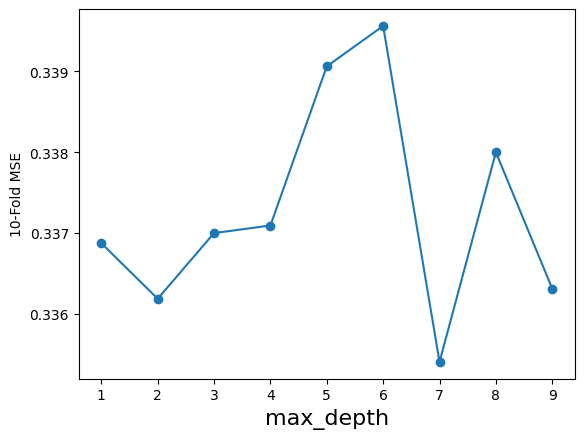

In [44]:
# 22.1. Ahora vamos a utilizar Cross Validation, para realizar la busqueda de los parámetros óptimos.
# Como hemos visto anteriormente, la matríx de correlación no muestras nincuna correlación significativa, por lo que no tenemos que realizar ningún tipo de paso para regularizar o eliminar columnas con gran correlacion.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring='accuracy', param_grid=param_grid, cv=10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

> Este código prueba diferentes valores para la profundidad de un árbol de decisión y elige el mejor, basándose en qué tan bien predice en varias pruebas; en este caso validación cruzada con 10 grupos de datos.
>
> Por lo tanto, podemos observar que el valor optimo es el parametro 6, pero el resultado no es satisfactorio. Esto es devido a posibles dos causas; subajuste o sobreajuste. 

In [45]:
# 22.2

maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.341875
Test:  0.3295


> Podemos observar que tanto el entrenamiento como el test tienen un resultado desfavorable.

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=2; total time=   1.6s
[CV] END .......................................

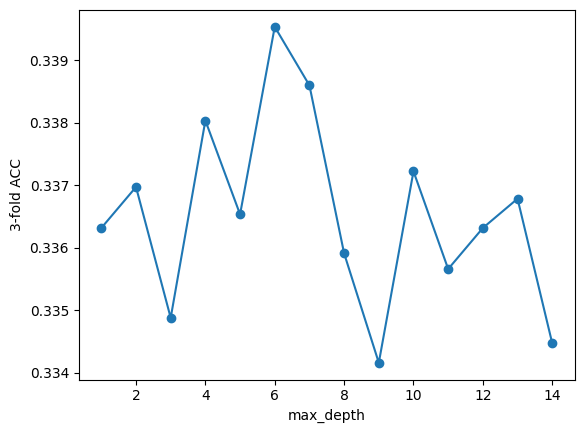

In [46]:
# 23. # Random forest. Es un modelo de aprendizaje automático que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

from sklearn.ensemble import RandomForestClassifier

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators=300), scoring='accuracy', param_grid=tuned_parameters, cv=7, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold ACC')

plt.show()

In [47]:
# 23.1. 

maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestClassifier(max_depth=maxDepthOptimo, n_estimators=300).fit(X_train,y_train)
model = randomForest

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.46646875
Test:  0.340625


> Podemoslos observar que el entrenamiento a mejorado pero el test sigue obteniendo unos resultados desfavorables.

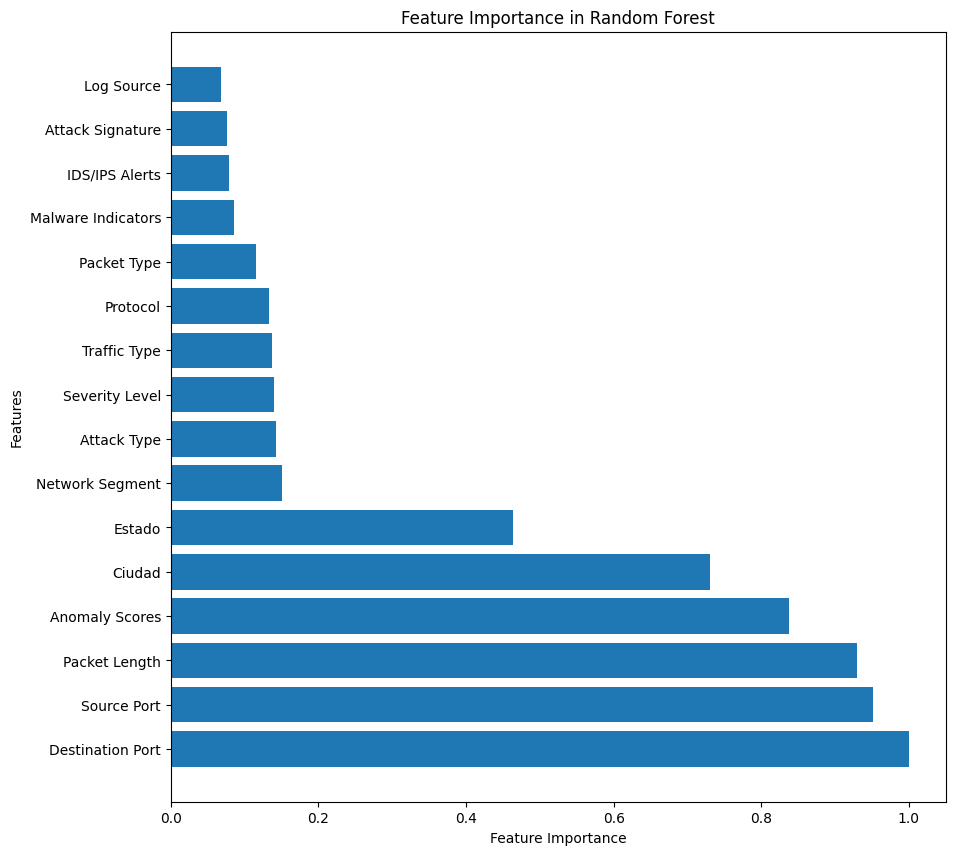

In [48]:
# 23.2. Ahora vamos a poder averiguar las columnas mas importantes.
# Random forest

# Obtener los nombres de las características
features = X_train.columns  

# Obtener la importancia de las características del modelo
importances = randomForest.feature_importances_
importances = importances / np.max(importances)  # Normalización

# Ordenar los índices según la importancia
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), features[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

> Podemos observar que la columna más importante para poder predecir en el modelo es Destinacion Port, Source Porte, Packet Length, Anomaly Scores, Ciudad y Estado. Por lo tanto, cuanto mas se hacerque al 1, mayor importancia tendrá.

In [49]:
# 24. Definimos y_pred 

y_pred = model.predict(X_test)  

Accuracy: 0.38
Confusion Matrix:
[[2549 1090  402]
 [2178 1408  388]
 [2191 1194  600]]


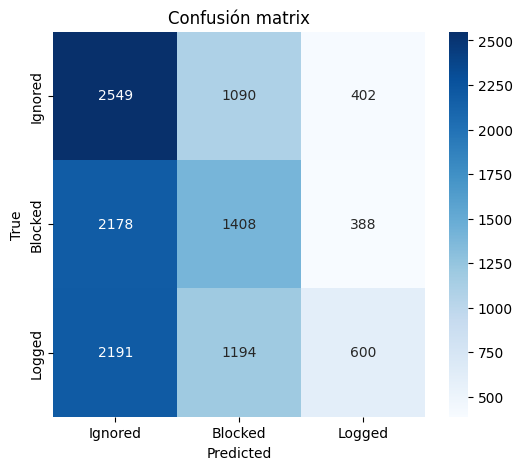

In [57]:
# 24.1. Confusionismos matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = x

# Identificar columnas categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns  

# Aplicar Label Encoding a las columnas categóricas, para convertirlas en cuantitativas.
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

# Ahora podemos dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Realizar las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Matriz de confusión
confmat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confmat)

# Confusionismos Matrix visualizada
confmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusión matrix")
plt.show()

### Confusión Matrix

Nos encontramos con dos categorias pricipales:  

> **True:** Ignored, Logged, Blocked (filas, valores reales)  
> **Predicted:** Ignored, Logged, Blocked (columnas, valores predichos)  

#### 1. Análisis por filas (True)  

1. **Clase “Ignored” (True)**  
   - **Correctamente clasificados como “Ignored”**: 2549  
   - **Incorrectamente clasificados como “Blocked”**: 1090  
   - **Incorrectamente clasificados como “Logged”**: 402  
   - **Precisión:**: No esta mal, pero hay un número significativo de errores.  

2. **Clase “Blocked” (True)**  
   - **Correctamente clasificados como “Blocked”**: 1408  
   - **Clasificados erróneamente como “Ignored”**: 2178 (muy alto)  
   - **Clasificados erróneamente como “Logged”**: 388  
   - **Problema principal**: La clase “Blocked” está siendo mal clasificada con mucha frecuencia, especialmente como “Ignored”.  

3. **Clase “Logged” (True)**  
   - **Correctamente clasificados como “Logged”**: 600  
   - **Clasificados erróneamente como “Ignored”**: 2191 (muy alto)  
   - **Clasificados erróneamente como “Blocked”**: 1194  
   - **Problema principal**: La clase “Logged” es la peor clasificada, con una gran cantidad de falsos negativos.  

#### 2. Posibles problemas en el modelo  
- **Alta confusión entre “Blocked” e “Ignored”**: El modelo tiende a predecir "Ignored" cuando el dato real es "Blocked" (**2178 errores**).  
- **Mala clasificación de "Logged"**: Solo **600 casos** fueron correctamente clasificados, mientras que **2191 fueron mal clasificados como "Ignored"**.  
- **Sesgo**: Parece que el modelo tiene un sesgo hacia la categoría "Ignored", clasificandolas incorrectamente en esta categoría.  

#### 3. Siguientes pasos  
1. Si hay más datos de una clase que de otra, podría estar afectando el rendimiento.  
2. Evaluar métricas calculando **accuracy, precisión, recall y F1-score** para cada clase.  
3. Despues habría que utilizar tecnicas **optimización del balanceo** y de esta manera **optimizar el modelo**.

In [60]:
# 24.2. Ahora tenemos que analizar el balanceo, si va a ser mas favorable hacia la precision o el recall.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

     Blocked       0.37      0.63      0.47      4041
     Ignored       0.38      0.35      0.37      3974
      Logged       0.43      0.15      0.22      3985

    accuracy                           0.38     12000
   macro avg       0.39      0.38      0.35     12000
weighted avg       0.39      0.38      0.35     12000



# 25. Conclusión final

Primero vamos a analizar los últimos datos obtenidos con el reporte de clasificación. De esta forma, podremos determinar qué pasos deberíamos haber seguido para mejorar el modelo.

> 1. **Precisión**: Se calcula dividiendo los *true positives* entre la suma de *true positives* y *false positives*. Lo que nos dice este modelo es que cuando algo es marcado como "Blocked", solo es correcto un 37% de las veces. Por lo tanto, la precisión de este modelo es bastante baja.

> 2. **Recall**: Se calcula dividiendo los *true positives* entre la suma de *true positives* y *false negatives*. En el caso de "Blocked", el recall es del 63%, lo que significa que el modelo está identificando solo el 63% de los casos reales de "Blocked". El resto, un 37%, son falsos negativos.

**Conclusión**: Dado que estamos trabajando con datos sobre permisos de acceso a usuarios, es más prudente aumentar el recall en lugar de la precisión. Esto se debe a que es más eficiente identificar correctamente los *true positives* y evitar otorgar permisos a usuarios que podrían ser perjudiciales para la empresa, lo que podría causar daños, especialmente económicos, además de perder credibilidad a la empresa.

**Por lo tanto**: Debemos aumentar los *true positives* y los *false positives*, y disminuir los *true negatives* y *false negatives* para que la balanza se incline hacia el recall, lo que reducirá la precisión.

Estas serían las mejoras que deberíamos de realizar al modelo, aunque si dejáramos el modelo tal como está, y si "Blocked" representa eventos importantes (como intentos de ataque bloqueados en ciberseguridad), el modelo generaría demasiadas falsas alarmas, lo que podría causar problemas operativos.

El modelo no esta listo para el uso.